In [13]:
import numpy as np

# NumPy with Simulation 

In this notebook we will look at numpy, however to illustrate its use we will consider the task of simulating a dataset. This is one of the major uses of numpy, but also, provides a context for understanding its features. 

We will start by considering quite complex examples, taking as a given how numpy works, and then reflect on these to explain more about the numpy library and how it helps. 

## Background on NumPy
NumPy is the foundation of nearly all analytical programming in python. It provides the basic data structure for fast data processing: the `array`.


### NumPy `array`s
An array is a homogenous sequential data collection. In sequence in memory, each block has the same data type, and the memory can be acceessed as a collection. 

The numpy library is very big and has lots of mathematical operations; in general, it may not be clear what these are for. By choosing some context for using numpy, eg., simulation of data, we can explore a meanignful part of the library and show some applications. 

## Simulating Data

Goal of simulating a dataset is to produce a set of points, ie., $(x_1, x_2, y)$ which are distributed according to some target distribution which models (, represents) a phenomenon of interest. 

That is, when I look at the values of $x_1$ I should see a sequence which "looks-like" a real world sequence of measurements. This simulate sequence may, eg., have the same mean as the real-world one; and vary in the same way.

We simulate datasets for lots of reasons:

* You have a limited dataset (make more data)
* You want to explore an existing dataset (simulate possibilities)
* You want to make statistical inferences (simulate to understand)

Will the simulation be informative?  (Yes | No)

* "No Surpises" simulation / debugging
    * the simulation is not informative
    * data is used as input into a previously unexplored process
    * the process is verified to produce results from known assumptions
* "No Suprises" wrt mathematics, but informative / bootstrapping
    * the simulation is not informative
    * ie., you could find out the result via analytical mathematics
    * but you simulate to make your life easier
    * e.g, in a hypothesis test, you simulate an alternative
* "Limited Suprises" EDA via Generation of Data (ie., simulation)
    * use a simulation to build a dataset which looks real-world
    * evolve the simulation to get close
    * review the simulation to understand precise empirical values
* Suprises
    * eg., bayseian modelling, statistical modelling
    * simulations are sufficienly complex that results are non-obvious
    * explaining complex phenomena
    * providing predictive results
       
Aside:

If you have a pre-existing scientific-explanatory model of an enviornment, a simulation is often likely to yield higher-qualtity data than you can collect. And therefore naive techniques on real-world data can produce inferiror solution to problems.

# Simulating & Debugging

Suppose you're working on a predictive project which uses a linear regression to predict a $\hat{y}$, say a profit, and you are given a *risk* score.

NB. A *risk* describes how well any particular (regression) model will perform. Eg., we could imagine it estimates the likely amount profit we will lose if we mispredict.

Suppose we are a cinema looking to offer discounts to our older customers, we really need to get an accurate picture of what they are going to spend...

* $x$ : Age
* $y$ : Profit
* $(w, b)$ : Slope, Intercept
* $\hat{y} = wx + b$ : Prediction

The question for our score is: *does our linear model give us good answers for older people*.

In [43]:
def risk(x, w, b, y):
    yhat = w*x + b
    
    # if age is over 50
    if x > 50:
        # compute a certain risk on profit
        return (y - yhat) ** 4
    else:
        # otherwas compute a lower risk on profit
        return (y - yhat) ** 2


In [44]:
w, b = 0.2, 4

x_my_age = 31
y_my_profit = 10
yhat_profit = w*x_my_age + b

yhat_profit

10.2

Naive view:

In [45]:
(yhat_profit - y_my_profit) ** 2

0.039999999999999716

In [46]:
risk(x_my_age, w, b, y_my_profit)

0.039999999999999716

Much worse if we're 60...

In [47]:
risk(60, w, b, y_my_profit)

1296.0

### Simulating to Understand More

In [16]:
from statistics import mean

Start with known assumptions and figure it out...

Here we simulate $(x, y)$ dataset by simulating `100` points from `0 to 1` and assuming they will yield $2x + 1$ profit..

In [48]:
xs = np.linspace(0, 100, 100) # ages from 0 to 100
ys = 2*xs + 1 # compute 100 predictions

Apply score... to check what it does..

In [49]:
mean([ risk(x, 2, 1, y) for x, y in zip(xs, ys) ])

0.0

So we have verified that the score makes sense if we use *correct* $w, b$.. what happens if we are slightly out on the, eg., $b$.

In [57]:
scores = []
for b in np.arange(-100, 100, 0.1):
    scores.append( mean([ risk(x, 2, b, y) for x, y in zip(xs, ys) ]) )

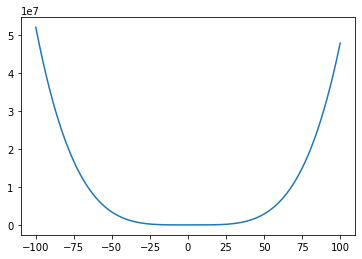

In [58]:
import seaborn as sns

sns.lineplot(np.arange(-100, 100, 0.1), scores);

Intrepretation: We observe a high risk when $|b| > 50$ 

# NumPy: Using Arrays

How can we use numpy to acheive this sort of data analysis...

NumPy == array

### Constructing Arrays

In [25]:
np.array

<function numpy.array>

We can convert from python lists to numpy arrays, and thereby obtain a fast and more space efficient data strucutre...

In [26]:
x_age = np.array([18, 21, 33, 49]) 

data type:

In [27]:
x_age.dtype

dtype('int32')

size in bytes

In [28]:
x_age.size

4

In [29]:
x_age.shape # 4 elements in sequence (unstructured sequence)

(4,)

In [30]:
import sys
sys.getsizeof(2)/x_age.size

7.0

### Making an Array

We can also ask numpy to generate arrays.

An array-range from $23$ to $30$ in steps of $0.5$...

In [31]:
x_temp = np.arange(23, 30, 0.5)

Preivew: list slicing works with numpy arrays

In [32]:
x_temp[-5:]

array([27.5, 28. , 28.5, 29. , 29.5])

We can ask for repetitions, zeros, ones (`eye`)...

In [33]:
np.zeros(5), np.repeat(2, 10)

(array([0., 0., 0., 0., 0.]), array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

### Aside: simulating a chance event with `repeat`

You can repeat sequences, here for example, eg., you get binary $y$ with a $p_{+} = \frac{1}{3}$...

In [19]:
y_success_fail = np.repeat([0, 0, 1], 5)
y_success_fail

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [20]:
y_success_fail.mean()

0.3333333333333333

eg., Fraud|NotFraud, Like|NotLike...

## Simulation of Random Data

Consider a real-world sequence of height measurements -- in any given population -- $1.7, 1.8, 1.5, 1.4, \dots$

To simulate this we want such an equivalent *realistic* sequence. Eg., suppose I wish for any significant subset of this sequence to have about the same mean, and in addition, for these means to be within a consistent range. 

I therefore believe that height is *normally distributed*. To simulate a dataset for height I wish to produce points $(h_0, \dots, h_N)$ which are  $ h \sim \mathcal{N}(\mu,\,\sigma^{2})$ ie., such that `mean(h)` is $\mu$, `std(h)` is $\sigma$ etc. 

I choose some simulation / distribution parameters *and generate* a dataset which is appromxiately described by those parameters (here: `N`, `h_mu`, `h_sigma`). 

In [21]:
h_mu = 170 # mean, height in cm
h_sigma = 15  # variability, in cm

N = 10 # number of points / resolution, or one kind of quality of the simulation

x_height = np.random.normal(h_mu, h_sigma, N)
x_height[:5]

array([161.84996198, 153.6208339 , 175.59351102, 173.12069396,
       182.75354446])

In [22]:
x_height.mean(), x_height.std()

(165.17636495298814, 9.026763467547978)

Numbers occuring with the same change from $0$ to $1$...

In [28]:
np.random.uniform(0, 1, 10)

array([0.5812585 , 0.85401195, 0.83633292, 0.72973793, 0.2595456 ,
       0.07589158, 0.02183993, 0.36244907, 0.77001015, 0.7013123 ])

## Exercise (15min)
Consider `Examples 1` and `Examples 2` and produce two simulations.
* Code one simulation by-hand with fixed entires.
* Code another using random numbers.

### Steps
* Chose a problem domain (eg., retail, health, etc.).
* Chose a case where you can measure two things and predict one.
* Simluate the predicted thing *from* the two known things. 
    * first hand-code values
    * use `np.random.normal`

* eg., health
* $y$ : sleep_hours, $x_1$ : amount_of_caffine (ml of coffee), $x_2$ : room_temp_of_bedroom (deg C)

HINT: copy, paste, modify

### Examples 1

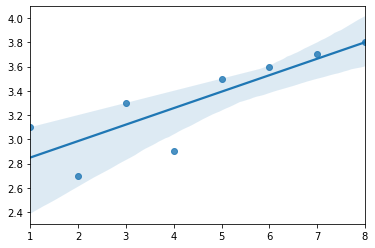

In [41]:
x_ages = np.array([1, 2, 3, 4, 5, 6, 7, 8])
x_visits = np.array([2, 1, 2, 1, 2, 2, 2, 2])
profit = 0.1*x_ages + 0.5*x_visits + 2

sns.regplot(x_ages, profit);

### Examples 2

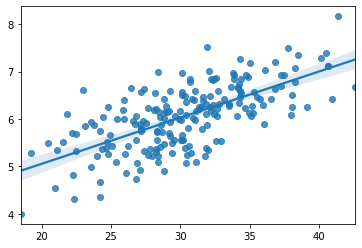

In [37]:
import seaborn as sns

ages = np.random.normal(30, 5, 200)
visits = np.random.normal(2, 1, 200) # visits to cinema / mo
profit = 0.1 * ages + 0.5 * visits + 2

sns.regplot(ages, profit);

## Eg., Solution

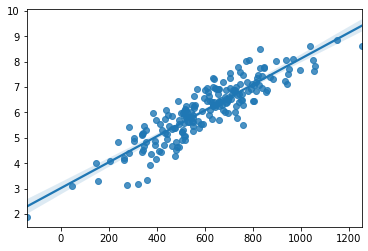

In [63]:
import seaborn as sns

coffee = np.random.normal(600, 200, 200)
temp = np.random.normal(20, 3, 200) 
hours = 0.5 * (coffee/100) + 0.1 * (temp/2) + 2

#eg., with error

errors = np.random.normal(0, 0.5, 200)
hours += errors

sns.regplot(coffee, hours);

# NumPy: The Details

## Broadcasting (Vectorization)
Notice that when we have applied an operation to an array, we have applied to every element..

Numerical operations are "broadcast" (or, more technically, vectorized); that is, they run *across* the array, element-wise. 


Vector: a one-column array structure. 

$2\vec{v}$

In [74]:
2 * np.array([1, 2])

array([2, 4])

Arrays are operated on *element-wise*...

In [75]:
np.array([2, 4, 6]) + np.array([-1, 1, -1])

array([1, 5, 5])

In [76]:
np.array([2, 4, 6]) * np.array([-1, 1, -1])

array([-2,  4, -6])

In [77]:
np.array([2, 4, 6]) - np.array([-1, 1, -1])

array([3, 3, 7])

In [78]:
np.array([2, 4, 6]) / np.array([-1, 1, -1])

array([-2.,  4., -6.])

### Aside:

In [79]:
np.array([2, 4, 6]) @ np.array([-1, 1, -1])

-4

Element-wise multiplication, *then*, addition.

In [80]:
(2 * -1) + (4 * 1) + (6 * -1)

-4

```python
prediction = w1 * x1 + w2 * x2 + b

prediction = np.array([w1, w2, b]) @ np.array([x1, x2])

prediction = W @ X
```

Interpretation: Weighted sum (ie., a total weighted by importance of each element)

In [81]:
np.array([0.1, 0.8, 0.1]) @ np.array([2, 4, 6])

4.0

In [82]:
0.1*2 + 0.8*4 + 0.1*6

4.0

$f(x; w) = w_0 + w_1x$  `= w @ [1, x]`

##NumPy Indexing

In numpy we can use slicing notation to pull out subsets of data. *However* *arrays* can have some structure that requires us to slice in particular ways.

### Array Structure
* unstructured : sequences of numbers
* vectors: sequence of numbers *in one column*
* matrices : sequence of numbers *in rows, and columns*
* ...


Unstructured

In [66]:
x = np.array([1, 2, 3])
x

array([1, 2, 3])

A sequence of 3

In [67]:
x.shape # shape, aka structure

(3,)

In [68]:
v = np.array([
    [1],
    [2],
    [3]
]) # vector, 1d columnar array

v

array([[1],
       [2],
       [3]])

A sequence of 3 rows, 1 col

In [69]:
v.shape

(3, 1)

In [79]:
M = np.array([
    [1, 2],
    [2, 4],
    [0, 1]
])

In [80]:
M # matrix, 2d array 

array([[1, 2],
       [2, 4],
       [0, 1]])

The shape here is 3 rows, 2 cols....

In [81]:
M.shape

(3, 2)

Aside:

The type gives a clue to how far this can go... n-dimensional

In [82]:
type(M)

numpy.ndarray

In [84]:
tensor = np.array([M, M, M, M])
tensor.shape

(4, 3, 2)

In [85]:
tensor

array([[[1, 2],
        [2, 4],
        [0, 1]],

       [[1, 2],
        [2, 4],
        [0, 1]],

       [[1, 2],
        [2, 4],
        [0, 1]],

       [[1, 2],
        [2, 4],
        [0, 1]]])

### List Slicing Syntax

Recall list slicing:

`x[ from_index : to_index ]`

* from_index defaults to `0`
* to_end defaults to `len(x)`
* `x[:]` means *from the beginning to the end*
    * ie., in "raw python" this just means `x`

`:` read as *all*

In [86]:
x1[:]

array([ 1.12334706,  1.47750048,  2.91005369,  1.28128839,  2.10926941,
       -0.23231558,  1.5060741 ,  0.68459292,  3.39805643,  1.51512025])

first two

In [87]:
x1[:2]

array([1.12334706, 1.47750048])

last but 2

In [88]:
x1[-2:]

array([3.39805643, 1.51512025])

first two

In [89]:
x1[0:2]

array([1.12334706, 1.47750048])

last but 5

In [90]:
x2[-5:]

array([14.43838009, 14.33595782, 16.93820971, 22.35961243, 13.51684636])

From the middle to the end...

In [90]:
x[ len(x) // 2 : ]

array([2, 3])

Aside:


`len(x) // 2`

* integer division:
    * //
* len()
    * the length of the array
* `//2` 
    * an index which half way


### Matrix Slicing (Generalized Slicing)

Machine Learning convention:

$M^r_c$ -- row index on top, column index on bottom

Column index refers to a "geninue" variable.
Row index is just the index of an observation, ie., an entry in a column. 

Most formula are defined for *all observations*, ie., formula are not specific to individual observations.

Often we leave the row index out, because we mean *all rows*. In python you cannot omit an index, so use `:` .

In [91]:
M

array([[1, 2],
       [2, 4],
       [0, 1]])

$M_{r, c}$ : typical mathematical notation

* $M^r_c$ : machine learning convention
* $M_c$ : all columns 
    * `M[:, c]`

All rows, the firs column

In [92]:
M[:, 0]

array([1, 2, 0])

The second row, first column

In [93]:
M[1, 0]

2

In mathematics we often start indexes running at $1$...


$y = M_1 + M_2 + 5$



In [94]:
M[:, 0] + M[:, 1] + 5

array([ 8, 11,  6])

## Example

We can keep track of multiple variables in a matrix, ...

```python

X = np.array([
    [x1, x2],
    ...
])
```

... rather than a separate x1, x2.

eg., suppose:

* $X = \{(x_1, x_2), \dots\}$ : (Age, Visits)
* $y$ : Profit per Customer

In [100]:
X = np.array([
    [18, 2],
    [19, 1],
    [21, 3],
    [20, 1],
    [22, 1],
])

y = 0.1 * X[:, 0] + 0.2 * X[:, 1] + 2

y

array([4.2, 4.1, 4.7, 4.2, 4.4])

Aside: 

recall numpy has an operation to do just this...

In [101]:
w = np.array([0.1, 0.2])
y = X @ w + 2
y

array([4.2, 4.1, 4.7, 4.2, 4.4])

## Exercise: Indexing Arrays (20min)

### In the array `y` above, select:
* the first value
* last value
* extra: middle value
* last two values 

### In the  matrix above, `X`, select:
* the first column (all rows)
* the last column (all rows)
* the first element 
* the last row of the first column
* the first two rows of the last column
* the first observation
    * the first row, all columns
    
### Extra:
* Rephase your hard-coded simulated datasets above (ie., your x1, x2) as a matrix..
* Then compute your prediction 
* ie., take the example above and re-do for your problem

In [102]:
y

array([4.2, 4.1, 4.7, 4.2, 4.4])

In [104]:
y[0], y[-1], y[len(y)//2], y[-2:]

(4.2, 4.4, 4.7, array([4.2, 4.4]))

In [103]:
X

array([[18,  2],
       [19,  1],
       [21,  3],
       [20,  1],
       [22,  1]])

In [105]:
X[:, 0], X[:, -1], X[0, 0], X[-1, 0], X[0:2, -1]

(array([18, 19, 21, 20, 22]), array([2, 1, 3, 1, 1]), 18, 22, array([2, 1]))

In [106]:
X[0, :]

array([18,  2])

## Masking

Masking is the process of showing and hiding data (pieces of a numpy array) based on a condition; ie., we use True/False to select data.

In [107]:
ages = np.random.normal(30, 10, 5).astype(np.float16) # .int, float, np.int32, np.float32, np.float64

Aside: note the ability to convert to different numeric datatypes. Here float16 is a low-precision number, which has the advantage of slighly more realistic age measurements.

In [108]:
ages

array([33.66, 32.94, 30.69, 25.6 , 18.19], dtype=float16)

We can apply comparison operators to an array, which are *broadcast* over every element.

In [109]:
ages > 30

array([ True,  True,  True, False, False])

Aside: 
* Q. what does the *mean* of a boolean vector (ie., an array of True/False) represent?
* A. *percentage* of elements which meet the condition.
* A. if the dataset is a *random variable* (ie., an experimental variable) it would be the $P(Age > 30)$

In [110]:
(ages > 30).mean()

0.6

In [116]:
ages

array([33.66, 32.94, 30.69, 25.6 , 18.19], dtype=float16)

A sequence of `True`, `False` can be used as an index:

In [114]:
ages[ [False, True, False, True, False] ] # mask, False = Hide, True = Show

array([32.94, 25.6 ], dtype=float16)

In [115]:
ages[ [False, True, False, False, False] ] # False = Hides, True = Shows

array([32.94], dtype=float16)

Recall: a test on an array is *broadcast* so only those elements which *pass* evaluate to True. 

By *filtering* (ie., indexing) on this test, you *show* only those elements which match. 

In [118]:
ages[ ages < 30 ]

array([25.6 , 18.19], dtype=float16)

In [119]:
ages[ ages > 30 ] # ages WHERE ages > 30

array([33.66, 32.94, 30.69], dtype=float16)

You don't necessary think through the detail of this process. Mostly, you'll just go straight to writing the comparsion.

#### Advanced Comparsions: Boolean Broadcast Operators

The default python boolean operators are *not* broadcast; ie., they don't work with numpy arrays.

In [120]:
(5 > 1) and (0 < 1)

True

NumPy provdies alternatives which are `&` for AND, and `|` for OR...

In [121]:
(ages > 20)

array([ True,  True,  True,  True, False])

In [123]:
(ages < 30)

array([False, False, False,  True,  True])

In [124]:
(ages > 20) & (ages < 30)

array([False, False, False,  True, False])

In [125]:
ages[ (ages > 20) & (ages < 30) ]

array([25.6], dtype=float16)

In [130]:
ages[ (ages < 30) | (ages > 35)  ]

array([25.6 , 18.19], dtype=float16)

## Exercise

In [131]:
y

array([4.2, 4.1, 4.7, 4.2, 4.4])

In [132]:
X

array([[18,  2],
       [19,  1],
       [21,  3],
       [20,  1],
       [22,  1]])

## Exercise: Indexing Arrays (15 min)

### In the array `y` above, select:
* values which are exactly `4.2`
* values above `4.5`
* values below `4.5`
* values in the range `4.4` to `4.8` inclusive
    * HINT: `&`

### EXTRA: In the  matrix above, `X`, select:
* HINT: these are *row* queries, so, `X[ ..., somecols]`
* The visits column for people under 20
    * sum, mean, values
* The average age for people who visit `2` or fewer times.
* The average age for people who visit *either* exactly `2` or `3` times. 
    

In [135]:
from statistics import mean

In [136]:
y[ y == 4.2 ], y[ y > 4.5 ], y[ y < 4.5], y[ (y > 4.4) & (y < 4.8)]

(array([4.2, 4.2]), array([4.7]), array([4.2, 4.1, 4.2, 4.4]), array([4.7]))

`X` where the age column (`X[:, 0]`) is less than `20` ...

In [137]:
X[ X[:, 0] < 20, 1]

array([2, 1])

In [138]:
sum(X[ X[:, 0] < 20, 1]), mean(X[ X[:, 0] < 20, 1])

(3, 1)

In [140]:
mean(X[ X[:, 1] < 2, 0])

20

In [141]:
mean(X[ (X[:, 1] == 2) |  (X[:, 1] == 3) , 0])

19

## Appendix: Further Applications & Examples

### Hypothesis Testing

* In general we have some number of datasets $A, B, \dots$ which are measurements from some experiment where we have varied a policy between conditions $A, B, \dots$ and we wish to determine whether these are consistent with some hypothesis.

* eg., Suppose you are asked to determine whether a discount on a website is effective at raising profits. Policy A: no discount, Policy B: discount... you wish to see which has a high profit. 

In [143]:
A_avg_profit_per_product = 10
A_var_profit_per_product = 3
A_num_products_purchased = 100 

B_avg_profit_per_product = 9
B_var_profit_per_product = 3
B_num_products_purchased = 100 


A = np.random.normal(A_avg_profit_per_product, A_var_profit_per_product, A_num_products_purchased)
B = np.random.normal(B_avg_profit_per_product, B_var_profit_per_product, B_num_products_purchased)

The profit on the first five purchases during the `A` campaign...

In [145]:
A[:5]

array([ 9.20494353,  7.33608724, 15.59291376, 18.00811418, 10.06090606])

The question is whether `A` is more profitable than `B`, ie., 

$P(A > B)$

In [148]:
(A > B).mean()

0.61

From this dataset we infer that there is a 61% chance A is more profitable than B...

Do we implement A?

The probability we are wrong:

In [149]:
1 - (A > B).mean()

0.39

Typically we set some tolerance to risk (of being wrong), eg., 20%, and we only affirm the hypothesis if "being wrong" is sufficiently improbable...

In [396]:
(1 - (A > B).mean()) < 0.2

False

Using 20%, we conclude that we cannot distinguish between A and B.

NOTE: we **do not** conclude A and B are the same. 

In [398]:

A = np.random.normal(10, 0.4, 10_000)
B = np.random.normal(9, 0.4, 10_000)

((1 - (A > B).mean()) * 100) < 5

True

Here, we conclude with a risk of $5\%$ that `A` is genuinely more profitable than `B`...

### Aside:

We are actually computing $P(Data|Hypothesis)$, we should scale by $P(Data)$ to compute $P(Hypothesis|Data)$ via bayes rule. The approach above illustrates the simplicity of the method. 

### Predictive Analytics (aka Machine Learning)

* What do you do about outliers?

`!pip install sklearn`

In [168]:
from sklearn.linear_model import LinearRegression, Lasso

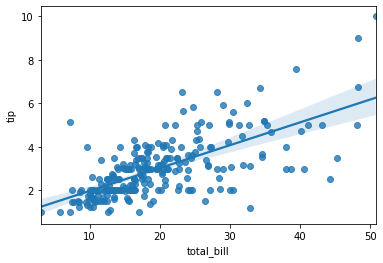

In [171]:
import seaborn as sns

tips = sns.load_dataset('tips')
sns.regplot(tips['total_bill'], tips['total_bill']);

In [178]:
X = tips[['total_bill']].values
y = tips['tip']

In [179]:
X[:5]

array([[16.99],
       [10.34],
       [21.01],
       [23.68],
       [24.59]])

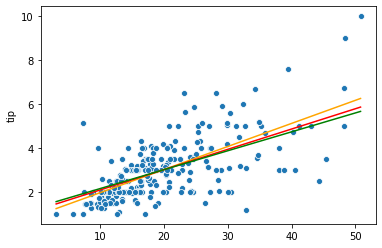

In [189]:
sns.scatterplot(X.ravel(), y);
sns.lineplot(X.ravel(), LinearRegression().fit(X, y).predict(X), color="orange")
sns.lineplot(X.ravel(), Lasso().fit(X, y).predict(X), color="red")
sns.lineplot(X.ravel(), Lasso(1.5).fit(X, y).predict(X), color="green");

### Are datasets without outliers different?

Risk I screwed up: $P_{difference} = P((X_{without} > X_{with}) | (X_{without} < X_{with}))$

For two groups to be different either one is greater than the other...

In [303]:
groupA = np.array([10, 10, 10, 10, 10])
groupB = np.array([8, 8, 8, 10, 10])

((groupA > groupB) | (groupB > groupA)).mean()

0.6

Better to read this as a $40%$ chance they are the same (which is quite high): there is a `4 in 10` chance our belief about them being different is wrong!

For the dataset above, suppose we take $y > \mu_y \pm \sigma_y$ as the condition for $y$ being and outliner... then, 

In [317]:
high, low = y.mean() + y.std(), y.mean() - y.std()
keep = (y > low) & (y < high)

ykeep = y[keep]
Xkeep = X[keep]

In [319]:
print(len(y), y.mean(), y.std())
print(len(ykeep), ykeep.mean(), ykeep.std())

244 2.99827868852459 1.3836381890011822
182 2.798021978021978 0.742416123997692


In [323]:
A = np.random.choice(y.values, len(ykeep))
B = ykeep.values

In [324]:
((A > B) | (B > A)).mean()

0.9505494505494505

If we assume they are the same, then there is a $5%$, or `1 in 20`, risk we are wrong:

In [329]:
risk = 1 - ((A > B) | (B > A)).mean()

round(risk * 100)

5.0

Aside:

Note, the outlier condition is not a good one... we should really select points in $y$ which are outliers within some range of $X$, eg., consider the high-paying customers who leave extreme tips.

This analysis is applied to the whole range of $y$.

## More on Hypothesis Testing

We treat $a$ and $b$ as random variables, ie., where each entry in the sequence $a$ is an indepedent observation of some event $a$:

In [348]:
a = np.array([6, 3, 8, 12, 6]) # dice rolls -- weighted by policy A
b = np.array([3, 7, 2, 10, 6]) # dice rolls -- weighted by policy B

Then $P(a > b)$ is the long-run frequency of the times $a > b$:

In [347]:
(a > b).mean()

0.8

Note that "long run" means that we need sufficient observations of $a$ and $b$ for our calculation to be accurate.

We can approximate the question above *by asking* how "significant" is a difference in their means...

In [353]:
(a.mean() - b.mean())/(a.std() + b.std())

0.23984843989200114

... ie., this would $0$ if the datasets were identical. 

However comparing *means* in this way is a highly approximate method which tries to characterize all observations by one number (a mean), and use that. It has been, in practice, a very confusing way of teaching hypothesis testing -- which is a simple question of probability that has nothing to do with means. 

It is simply that a near-zero difference in means happens to occur when the measures are, probabilitically, the same. Though this methods is faliable and tends to give an exagerated confidence in results (ie., the mean ends up not representing the dataset well).

Consider the coincidence of one measure being exactly the reverse of another:

In [394]:
one.mean() - two.mean()

0.0

Here we conclude `one` and `two` are the same, but they are totally different!

In [395]:
one, two

(array([0, 2, 3, 3, 3, 4, 5, 7, 8, 9]), array([9, 8, 7, 5, 4, 3, 3, 3, 2, 0]))

### Aside

A basic null hypothesis test, *is just* a comparsion of a measured population $A$ against a simulated dataset, $B$ which represents no-effect. 

$P(A > 10)$

In [356]:
(a > 10).mean()

0.2

NB.
$a$, $b$ are *random variables* which means that the particular way they are randomly sequences is *part of* what characterises them.

If you sort them they become deterministic, *not* random variables:

In [386]:
outcomes = np.random.uniform(0, 10, 10).astype(int)

one = np.sort(outcomes)
two = np.flip(one)

three = np.random.choice(outcomes, 10)
four  = np.random.choice(outcomes, 10)

Here we generate `10` outcomes at random from the range `0` to `10`:

In [387]:
outcomes

array([7, 2, 9, 3, 3, 3, 8, 0, 5, 4])

`one` and `two` are sorted; `three` and `four` are drawn at random:

In [388]:
one, two, three, four

(array([0, 2, 3, 3, 3, 4, 5, 7, 8, 9]),
 array([9, 8, 7, 5, 4, 3, 3, 3, 2, 0]),
 array([3, 8, 4, 3, 3, 9, 8, 4, 2, 5]),
 array([3, 5, 7, 3, 3, 2, 3, 3, 3, 5]))

Note that these are the *same* numbers, but *totally different* kinds of events.

In [389]:
((two > one) | (one > two)).mean(), ((three > four) | (four > three)).mean()

(1.0, 0.6)

Here we see the $P(one \neq two)$ is certain (they are always different); and $P(three \neq four)$ is much lower.